In [82]:
import keras
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import sys
sys.path.append('/content/drive/My Drive/ML_trace_predictor/')
import perceptron
import features as f
import numpy as np

Mounted at /content/drive/


In [84]:
history_length = 4
num_of_classes = 16
ifthenelse_filepath  = '/content/drive/My Drive/ML_trace_predictor/datafiles/ifthenelse/predictionAccuracy.csv'
#libquantum_filepath  = 'datafiles/libquantum/predictionAccuracy.csv'
libquantum_filepath  = '/content/drive/My Drive/ML_trace_predictor/datafiles/short_libquantum/predictionAccuracy.csv'
nested_filepath      = '/content/drive/My Drive/ML_trace_predictor/datafiles/nested/predictionAccuracy.csv'
consecutive_filepath = '/content/drive/My Drive/ML_trace_predictor/datafiles/consecutive/predictionAccuracy.csv'

ifthenelse_features, ifthenelse_labels = f.generateTraceFeatures(consecutive_filepath, history_length, num_of_classes)

In [18]:
from sklearn.preprocessing import OneHotEncoder

## If then Else

In [32]:
ifthenelse_labels = ifthenelse_labels.reshape(-1,1)
Label_encoder = OneHotEncoder(sparse=False)
Label_encoder.fit(ifthenelse_labels)
ifthenelse_labels = Label_encoder.transform(ifthenelse_labels)
ifthenelse_labels

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [34]:
ifthenelse_features = np.expand_dims(ifthenelse_features,2)

In [35]:
n_timesteps, n_features = ifthenelse_features.shape[1], ifthenelse_features.shape[2]

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=10, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(keras.layers.Conv1D(filters=10, kernel_size=4, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
training_dataset = ifthenelse_features[:int(len(ifthenelse_features)*0.1)]
training_labels = ifthenelse_labels[:int(len(ifthenelse_labels)*0.1)]
val_dataset = ifthenelse_features[int(len(ifthenelse_features)*0.1):int(len(ifthenelse_features)*0.15)]
val_labels = ifthenelse_labels[int(len(ifthenelse_labels)*0.1):int(len(ifthenelse_labels)*0.15)]

In [42]:
es=keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3,min_delta=0.05)
history = model.fit(training_dataset,training_labels,validation_data=(val_dataset,val_labels),epochs=100,batch_size=32,callbacks=[es], verbose=1)

Epoch 1/100
1565/1565 [==============================] - 14s 8ms/step - loss: 0.1725 - accuracy: 0.9388 - val_loss: 0.0145 - val_accuracy: 0.9980
Epoch 2/100
1565/1565 [==============================] - 12s 7ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 3/100
1565/1565 [==============================] - 12s 8ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0118 - val_accuracy: 0.9990
Epoch 4/100
1565/1565 [==============================] - 15s 10ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0054 - val_accuracy: 0.9990
Epoch 4: early stopping


In [45]:
test_dataset = ifthenelse_features[int(len(ifthenelse_features)*0.15):]
test_labels = ifthenelse_labels[int(len(ifthenelse_labels)*0.15):]

In [46]:
score = model.evaluate(test_dataset, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.005434003658592701
Test accuracy: 0.9990033507347107


## Nested Dataset

In [98]:
nested_features, nested_labels = f.generateTraceFeatures(nested_filepath, 4, num_of_classes)

In [99]:
nested_labels = nested_labels.reshape(-1,1)
Label_encoder = OneHotEncoder(sparse=False)
Label_encoder.fit(nested_labels)
nested_labels = Label_encoder.transform(nested_labels)
nested_labels.shape

(500496, 12)

In [100]:
nested_features = np.expand_dims(nested_features,2)

In [101]:
n_timesteps, n_features, n_outputs = nested_features.shape[1], nested_features.shape[2], nested_labels.shape[1]

In [102]:
nested_features.shape

(500496, 64, 1)

In [104]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=25, kernel_size=32, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(keras.layers.Conv1D(filters=25, kernel_size=32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
training_dataset = nested_features[:int(len(nested_features)*0.1)]
training_labels = nested_labels[:int(len(nested_labels)*0.1)]
val_dataset = nested_features[int(len(nested_features)*0.1):int(len(nested_features)*0.15)]
val_labels = nested_labels[int(len(nested_labels)*0.1):int(len(nested_labels)*0.15)]

In [106]:
es=keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3,min_delta=0.005)
history = model.fit(training_dataset,training_labels,validation_data=(val_dataset,val_labels),epochs=100,batch_size=32,callbacks=[es], verbose=1)

Epoch 1/100
1565/1565 [==============================] - 14s 8ms/step - loss: 0.8804 - accuracy: 0.7042 - val_loss: 0.5711 - val_accuracy: 0.7582
Epoch 2/100
1565/1565 [==============================] - 11s 7ms/step - loss: 0.5841 - accuracy: 0.7664 - val_loss: 0.5443 - val_accuracy: 0.7792
Epoch 3/100
1565/1565 [==============================] - 11s 7ms/step - loss: 0.5625 - accuracy: 0.7689 - val_loss: 0.5403 - val_accuracy: 0.7792
Epoch 4/100
1565/1565 [==============================] - 12s 8ms/step - loss: 0.5497 - accuracy: 0.7701 - val_loss: 0.5335 - val_accuracy: 0.7722
Epoch 5/100
1565/1565 [==============================] - 13s 8ms/step - loss: 0.5404 - accuracy: 0.7713 - val_loss: 0.5190 - val_accuracy: 0.7502
Epoch 5: early stopping


In [107]:
test_dataset = nested_features[int(len(ifthenelse_features)*0.15):]
test_labels = nested_labels[int(len(ifthenelse_labels)*0.15):]

In [108]:
score = model.evaluate(test_dataset, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5189937353134155
Test accuracy: 0.7502503395080566


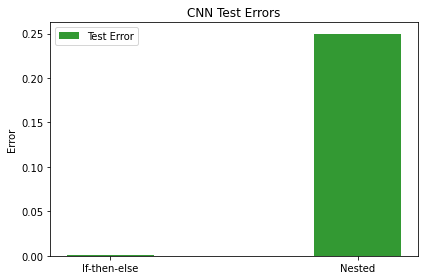

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8
rects2 = plt.bar(index + bar_width, [1-0.999, 1-0.750], bar_width,
                    alpha=opacity,
                    color='g',
                    label='Test Error')

plt.ylabel('Error')
plt.title('CNN Test Errors')
plt.xticks(index + bar_width, ('If-then-else', 'Nested'))
plt.legend()
plt.tight_layout()
plt.show()